In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as scale
from wrangle import wrangle_zillow
from scipy import stats
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


np.random.seed(302)

In [4]:
df = wrangle_zillow()
df.info()
df.head()

Reading from CSV file...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 20 to 2982282
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   bedrooms      int64  
 1   bathrooms     int64  
 2   calcfin_sqft  int64  
 3   tax_val       int64  
 4   yr_built      int64  
 5   tax_amt       float64
 6   fips          int64  
dtypes: float64(1), int64(6)
memory usage: 130.6 MB


,bedrooms,bathrooms,calcfin_sqft,tax_val,yr_built,tax_amt,fips
20,4,2,3633,296425,2005,6941.39,6037
31,3,4,1620,847770,2011,10244.94,6037
33,3,2,2077,646760,1926,7924.68,6037
62,0,0,1200,5328,1972,91.60,6037
97,0,0,171,6920,1973,255.17,6037


In [5]:
# take a look inside the toolbox
dir(scale)

['Binarizer',
 'FunctionTransformer',
 'KBinsDiscretizer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'OrdinalEncoder',
 'PolynomialFeatures',
 'PowerTransformer',
 'QuantileTransformer',
 'RobustScaler',
 'StandardScaler',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_csr_polynomial_expansion',
 '_data',
 '_discretization',
 '_encoders',
 '_function_transformer',
 '_label',
 'add_dummy_feature',
 'binarize',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'power_transform',
 'quantile_transform',
 'robust_scale',
 'scale']

In [6]:
# split df, isolate target variable
train, test = train_test_split(df, train_size=0.8, random_state= 302)
train, validate = train_test_split(train, train_size=0.7, random_state= 302)

X_train = train.drop(columns= ['tax_val'])
y_train = train.tax_val

X_validate = validate.drop(columns= ['tax_val'])
y_validate = validate.tax_val

X_test = test.drop(columns= ['tax_val'])
y_test = test.tax_val

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

Text(0.5, 1.0, 'Scaled - MinMax')

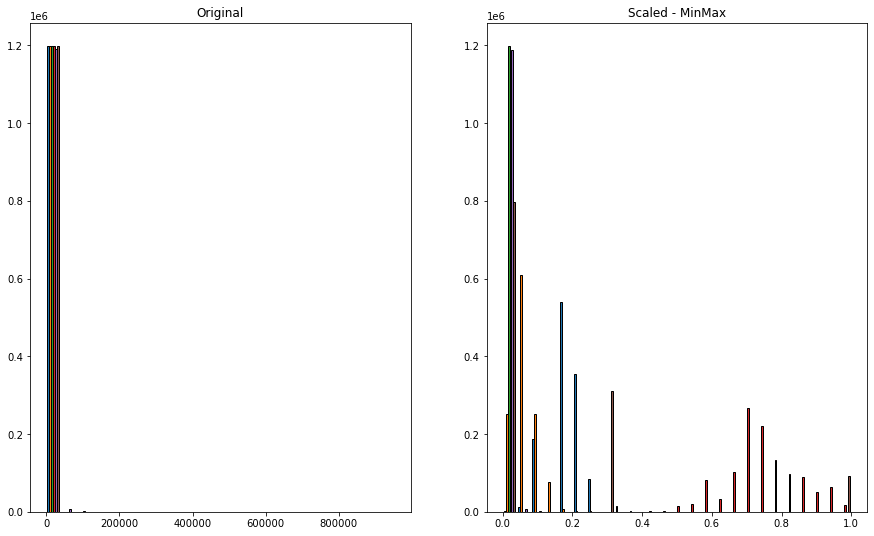

In [10]:
# set up, fit, and apply MinMaxScaler

min_max = scale.MinMaxScaler()

min_max.fit(X_train)

X_train_mm_scaled = min_max.transform(X_train)
X_validate_mm_scaled = min_max.transform(X_validate)
X_test_mm_scaled = min_max.transform(X_test)

plt.figure(figsize=(15,9))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(X_train_mm_scaled, bins=25, ec='black')
plt.title('Scaled - MinMax')






Text(0.5, 1.0, 'Scaled - Standard')

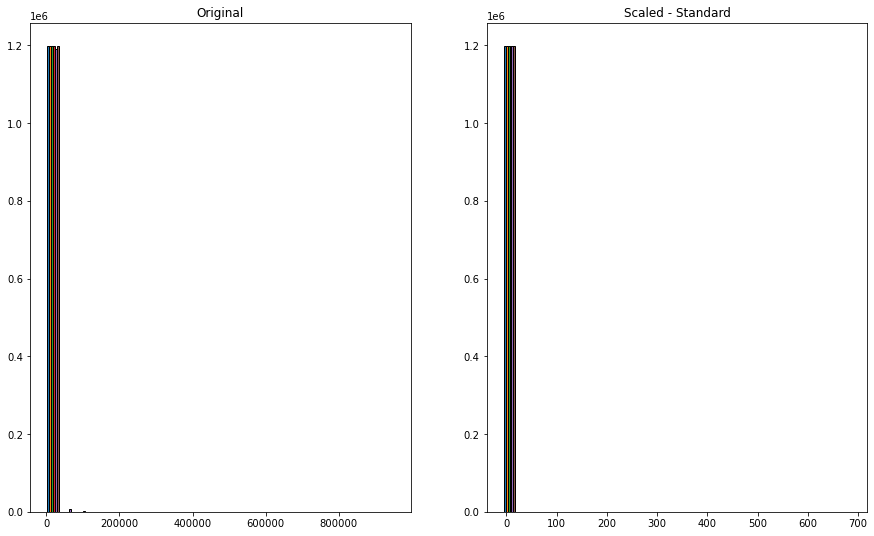

In [13]:
stand_scale = scale.StandardScaler()

stand_scale.fit(X_train)

X_train_st_scaled = stand_scale.transform(X_train)
X_validate_st_scaled = stand_scale.transform(X_validate)
X_test_st_scaled = stand_scale.transform(X_test)

plt.figure(figsize=(15,9))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(X_train_st_scaled, bins=25, ec='black')
plt.title('Scaled - Standard')

Text(0.5, 1.0, 'Scaled - Robust')

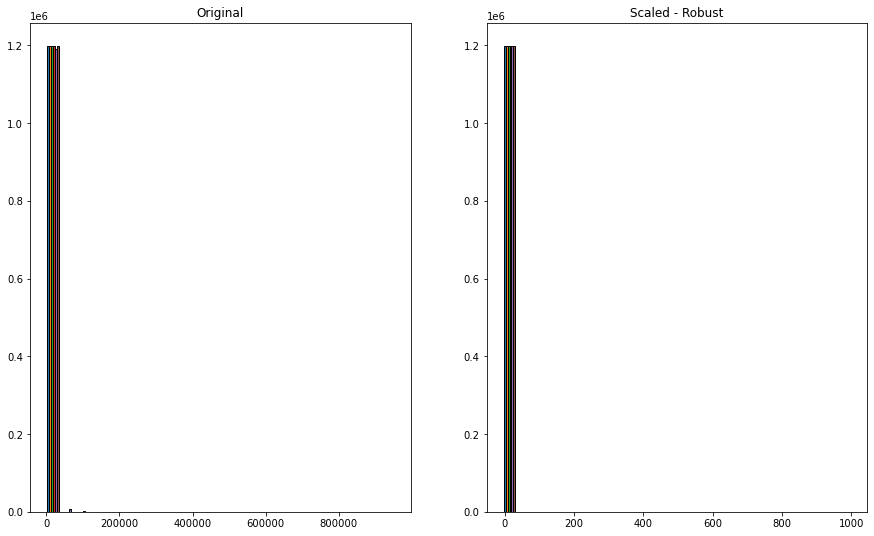

In [14]:
robust_scale = scale.RobustScaler()
robust_scale.fit(X_train)

X_train_rob_scaled = robust_scale.transform(X_train)
X_validate_rob_scaled = robust_scale.transform(X_validate)
X_test_rob_scaled = robust_scale.transform(X_test)

plt.figure(figsize=(15,9))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(X_train_rob_scaled, bins=25, ec='black')
plt.title('Scaled - Robust')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [20]:
print(min_max.inverse_transform(X_train))
print('--------------------------------------')
print(X_train.head())
print('--------------------------------------')
print(X_train.tail())

[[5.40000000e+01 6.40000000e+01 1.26692475e+09 4.27501000e+05
  4.81805450e+09 4.52775000e+05]
 [5.40000000e+01 6.40000000e+01 1.48696958e+09 4.22126000e+05
  5.44511817e+09 4.52775000e+05]
 [5.40000000e+01 6.40000000e+01 1.45743975e+09 4.22126000e+05
  1.41879704e+09 4.52775000e+05]
 ...
 [3.60000000e+01 3.20000000e+01 7.77301201e+08 4.16321000e+05
  3.57892315e+09 4.52775000e+05]
 [5.40000000e+01 6.40000000e+01 2.14138860e+09 4.33736000e+05
  8.34987029e+09 4.54403000e+05]
 [5.40000000e+01 3.20000000e+01 1.79941418e+09 4.21696000e+05
  1.30157952e+09 4.54403000e+05]]
--------------------------------------
         bedrooms  bathrooms  calcfin_sqft  yr_built  tax_amt  fips
718935          3          2          1330      1980  5728.60  6037
1858766         3          2          1561      1955  6474.17  6037
411251          3          2          1530      1955  1686.93  6037
2388252         3          1          1317      1947   967.03  6037
2604217         2          1           768   

In [21]:
print(stand_scale.inverse_transform(X_train))
print('--------------------------------------')
print(X_train.head())
print('--------------------------------------')
print(X_train.tail())

[[6.09733840e+00 4.13231048e+00 1.84405425e+06 4.58175925e+04
  4.42728387e+07 1.28969686e+05]
 [6.09733840e+00 4.13231048e+00 2.16401375e+06 4.52638474e+04
  5.00341627e+07 1.28969686e+05]
 [6.09733840e+00 4.13231048e+00 2.12107546e+06 4.52638474e+04
  1.30412034e+07 1.28969686e+05]
 ...
 [5.16513971e+00 3.15953372e+00 1.13210975e+06 4.46658027e+04
  3.28879704e+07 1.28969686e+05]
 [6.09733840e+00 4.13231048e+00 3.11558160e+06 4.64599369e+04
  7.67223909e+07 1.29417635e+05]
 [6.09733840e+00 3.15953372e+00 2.61832853e+06 4.52195478e+04
  1.19642344e+07 1.29417635e+05]]
--------------------------------------
         bedrooms  bathrooms  calcfin_sqft  yr_built  tax_amt  fips
718935          3          2          1330      1980  5728.60  6037
1858766         3          2          1561      1955  6474.17  6037
411251          3          2          1530      1955  1686.93  6037
2388252         3          1          1317      1947   967.03  6037
2604217         2          1           768   

In [22]:
print(robust_scale.inverse_transform(X_train))
print('--------------------------------------')
print(X_train.head())
print('--------------------------------------')
print(X_train.tail())

[[6.00000000e+00 4.00000000e+00 1.26645300e+06 5.54180000e+04
  2.21624185e+07 1.38851000e+05]
 [6.00000000e+00 4.00000000e+00 1.48613400e+06 5.47430000e+04
  2.50462945e+07 1.38851000e+05]
 [6.00000000e+00 4.00000000e+00 1.45665300e+06 5.47430000e+04
  6.52917834e+06 1.38851000e+05]
 ...
 [5.00000000e+00 3.00000000e+00 7.77639000e+05 5.40140000e+04
  1.64636333e+07 1.38851000e+05]
 [6.00000000e+00 4.00000000e+00 2.13947100e+06 5.62010000e+04
  3.84052966e+07 1.39335000e+05]
 [6.00000000e+00 3.00000000e+00 1.79806200e+06 5.46890000e+04
  5.99009309e+06 1.39335000e+05]]
--------------------------------------
         bedrooms  bathrooms  calcfin_sqft  yr_built  tax_amt  fips
718935          3          2          1330      1980  5728.60  6037
1858766         3          2          1561      1955  6474.17  6037
411251          3          2          1530      1955  1686.93  6037
2388252         3          1          1317      1947   967.03  6037
2604217         2          1           768   

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

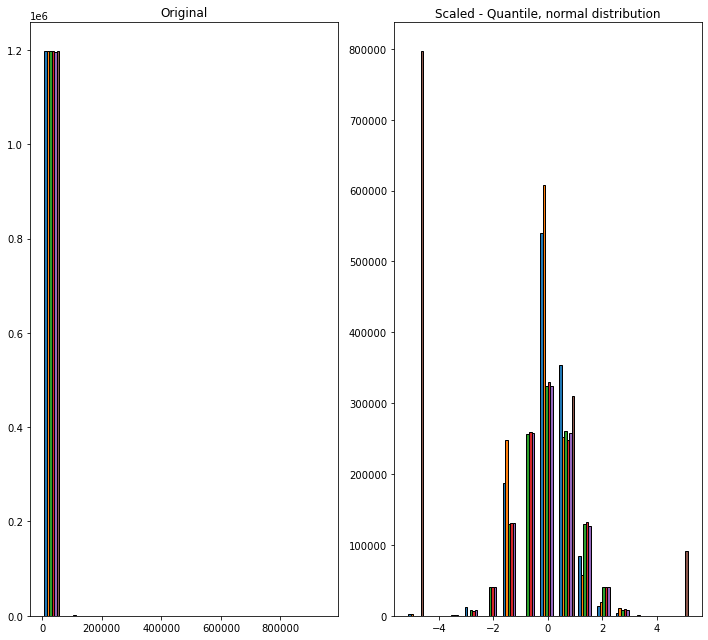

In [31]:
quant_scaler = scale.QuantileTransformer(output_distribution='normal')
quant_scaler.fit(X_train)

X_train_quant_scaled = quant_scaler.transform(X_train)

plt.figure(figsize=(15,9))
plt.subplot(131)
plt.hist(X_train, bins=15, ec='black')
plt.title('Original')

plt.subplot(132)
plt.hist(X_train_quant_scaled, bins=15, ec='black')
plt.title('Scaled - Quantile, normal distribution')

plt.tight_layout()


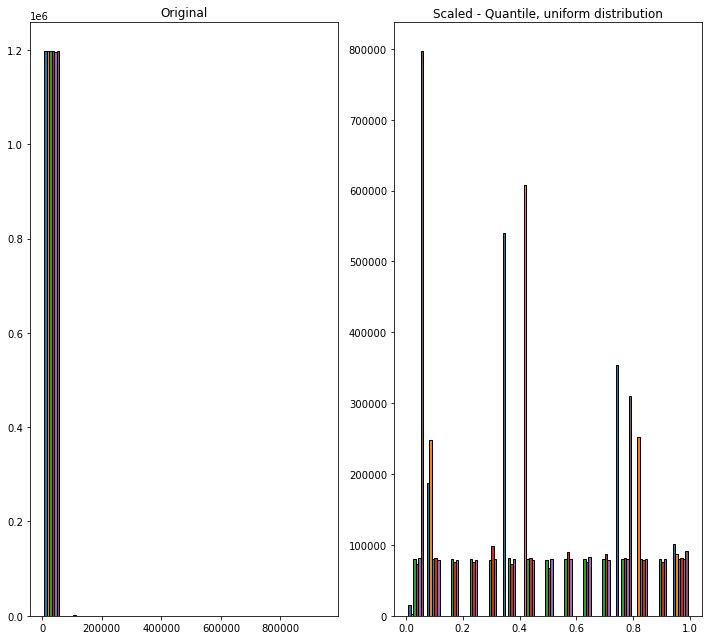

In [30]:
quant_scaler_uni = scale.QuantileTransformer()
quant_scaler_uni.fit(X_train)

X_train_quant_uni_scaled = quant_scaler_uni.transform(X_train)

plt.figure(figsize=(15,9))
plt.subplot(131)
plt.hist(X_train, bins=15, ec='black')
plt.title('Original')

plt.subplot(132)
plt.hist(X_train_quant_uni_scaled, bins=15, ec='black')
plt.title('Scaled - Quantile, uniform distribution')

plt.tight_layout()